In [97]:
import pandas as pd
import os
import warnings

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

import statsmodels.api as sm

In [98]:
warnings.simplefilter(action='ignore', category=UserWarning)

___
PATHS
___

In [99]:
base_dir = '/rri_disks/eugenia/meltzer_lab/NROD98/wab_xtract'

behav_path = base_dir + '/behavioral/wab_scores.csv'
tract_path = base_dir + '/native_diffusion_space_output'

lesion_wab_path = base_dir + '/tables/wab_lesion_volume.csv'
roi_damage_path = base_dir + '/tables/roi_damage.csv'
streamline_wab_path = base_dir + '/tables/wab_streamline.csv'
FA_wab_path = base_dir + '/tables/wab_mean_FA.csv'

___
LOAD TABLES
___

In [100]:
behav_cols = ['subj', 'wab_fluency', 'wab_av_comp', 'wab_rep', 'wab_obj_name', 'wab_aphasia_score']
track_list = ['af', 'ar', 'ifo', 'ilf', 'slf3', 'uf']
unused_track_list = ['atr', 'cbd', 'cbp', 'cbt', 'cst', 'fa', 'fx', 'mdlf','or', 'str', 'vof']
wab_list = ['wab_fluency', 'wab_av_comp', 'wab_rep', 'wab_obj_name', 'wab_aphasia_score']
roi_list = ['temporal', 'frontal', 'motor', 'parietal']
st_cols = ['subj'] + track_list

In [101]:
behavDF = pd.read_csv(behav_path)[behav_cols].dropna()
lesion_wab_DF = pd.read_csv(lesion_wab_path)
roi_damage_DF = pd.read_csv(roi_damage_path).rename(columns={'pid': 'subj'})
streamline_wab_DF = pd.read_csv(streamline_wab_path)
FA_wab_DF = pd.read_csv(FA_wab_path)

In [102]:
subj_list = behavDF.subj.to_list()

___
LOAD CORRELATION TABLES
___

In [103]:
lesion_wab_corr = pd.read_csv(base_dir + '/correlations/correlation_wab_lesion_volume.csv')
roi_damage_corr = pd.read_csv(base_dir + '/correlations/correlation_wab_roi_damage.csv')
streamline_wab_corr = pd.read_csv(base_dir + '/correlations/correlation_wab_streamline.csv')
FA_wab_corr = pd.read_csv(base_dir + '/correlations/correlation_wab_mean_FA.csv')

___
EXPLORE THE TABLES WITH SCATTERPLOTS
___

In [104]:
def draw_scatterplots(DF, X_var, Y_var, title_last_part):
    for i, x_v in enumerate(X_var):
        fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(15, 5))
                
        for j, wab_score in enumerate(Y_var):
            
            X = x_v
            Y = wab_score
            DATA = DF[[Y, X]]

            correlation, p_value = pearsonr(DATA[X], DATA[Y])
            
            sns.regplot(y=X, x=Y, data=DATA, ax=axes[j], scatter_kws={'s': 10})
            if p_value <= 0.05:
                axes[j].set_title(f'r: {correlation:.2f} || ***p-val***: {p_value:.2f}')
            else:
                axes[j].set_title(f'r: {correlation:.2f} || p-val: {p_value:.2f}')

            axes[j].set_yticklabels(axes[j].get_yticklabels(), fontsize=8)  # Set the fontsize to 8 for y-axis labels
            plt.suptitle('WAB CORRELATION WITH ' + x_v + title_last_part)

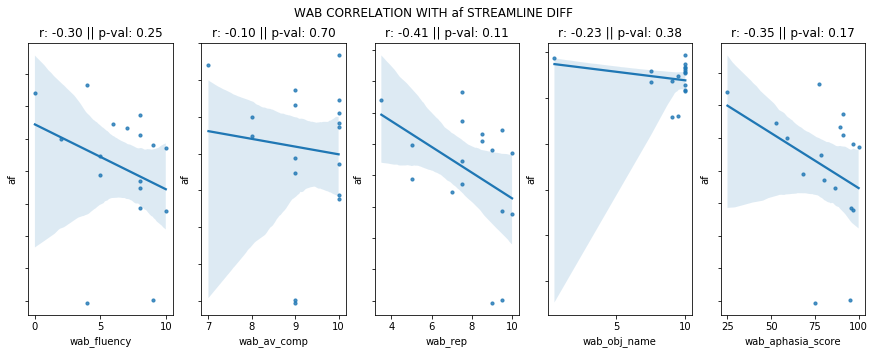

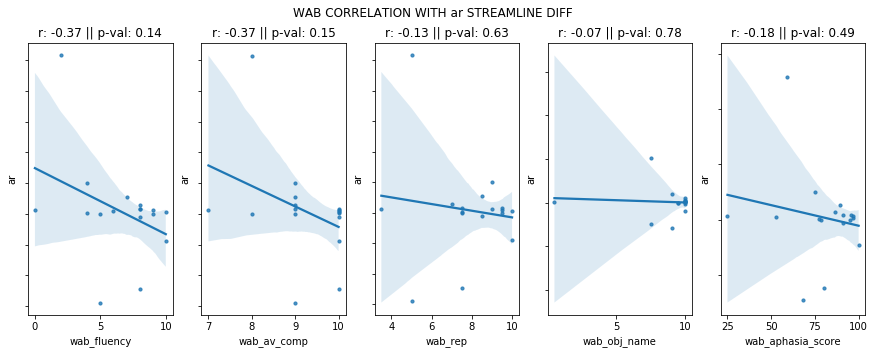

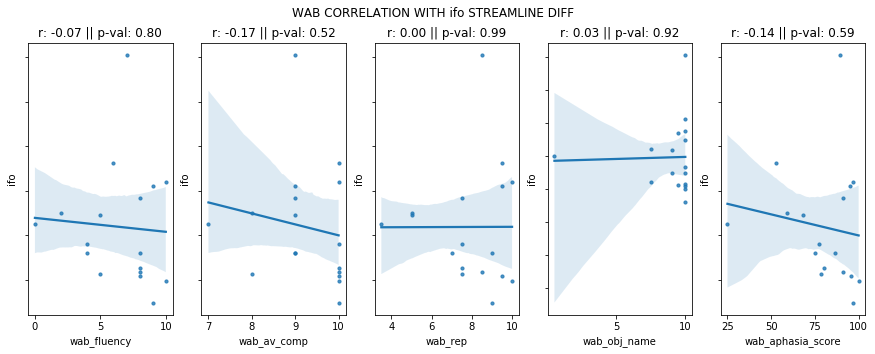

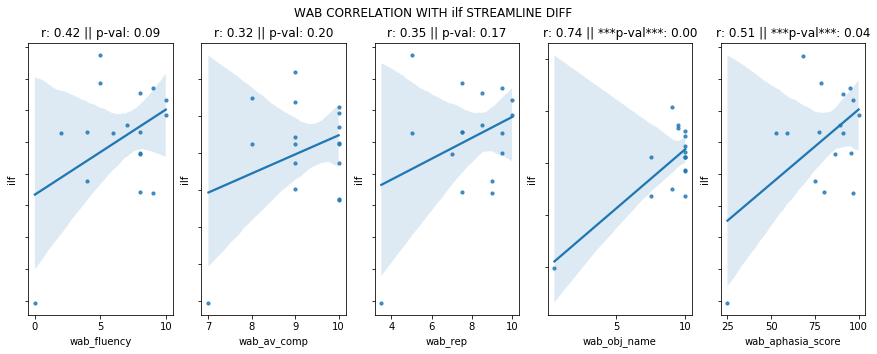

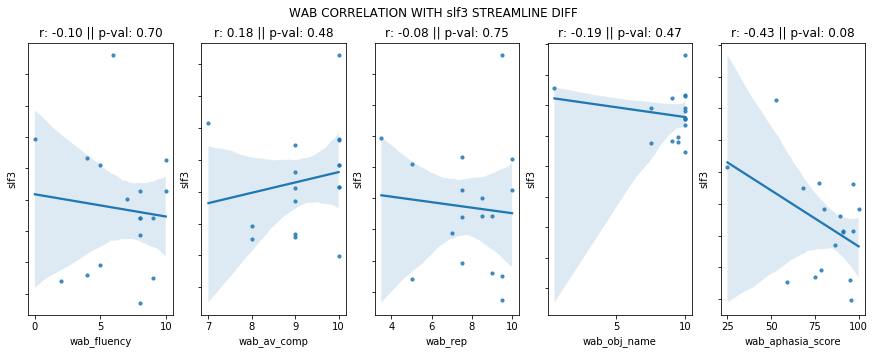

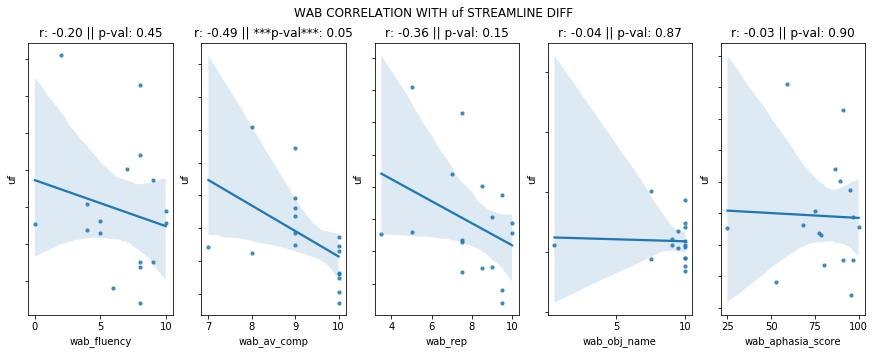

In [105]:
## PLOT SCATTERPLOTS OF 
## INTERHEMISPHERIC STREAMLINE COUNT DIFF VS WAB
draw_scatterplots(streamline_wab_DF, track_list, wab_list, " STREAMLINE DIFF")

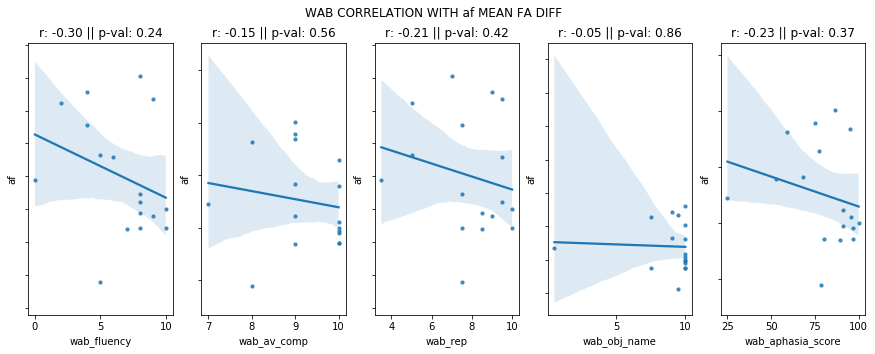

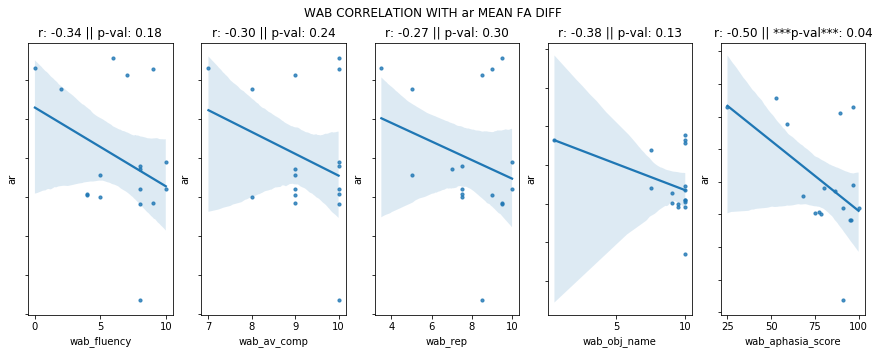

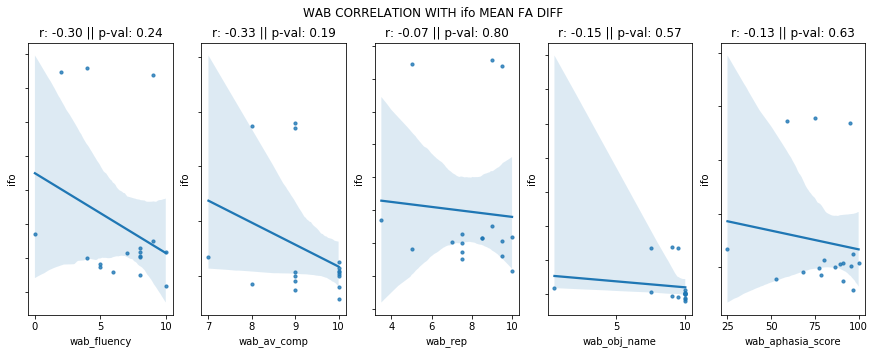

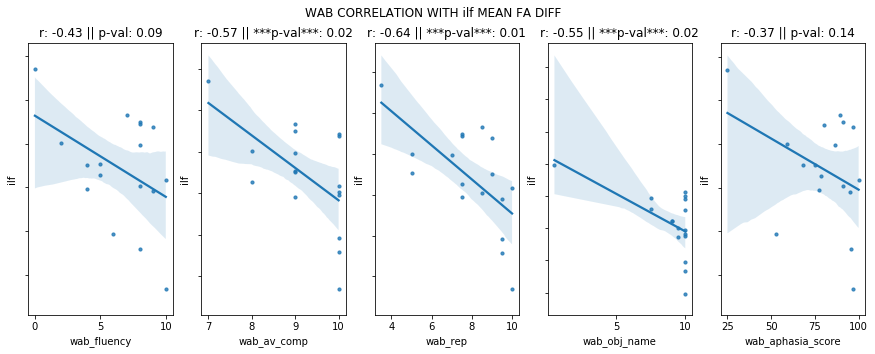

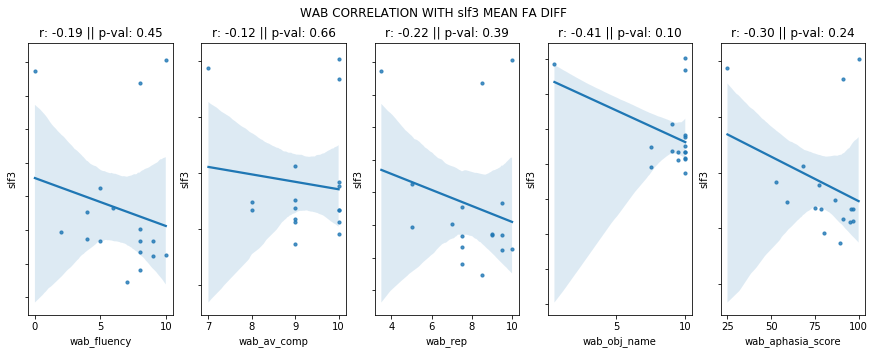

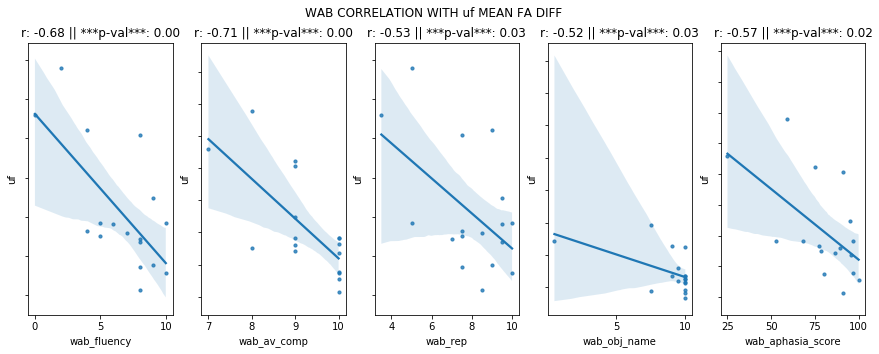

In [106]:
## PLOT SCATTERPLOTS OF 
## INTERHEMISPHERIC MEAN FA DIFF VS WAB
draw_scatterplots(FA_wab_DF, track_list, wab_list, " MEAN FA DIFF")

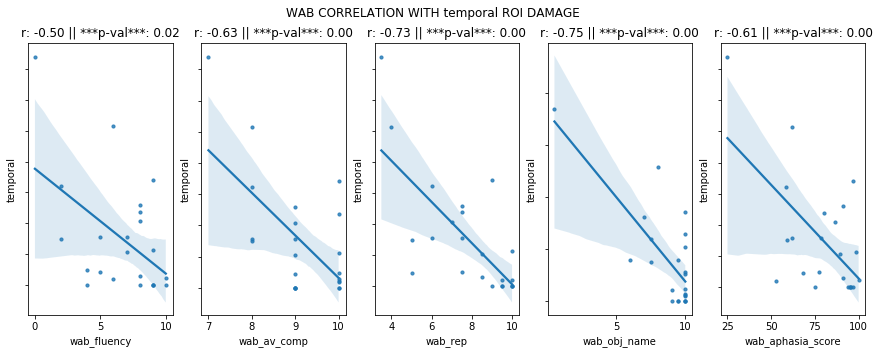

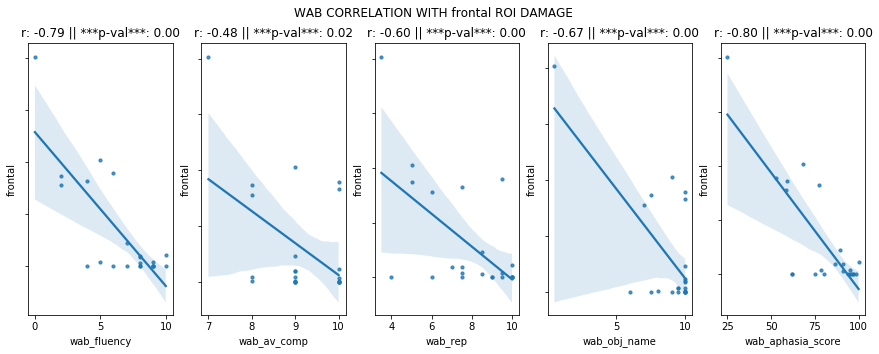

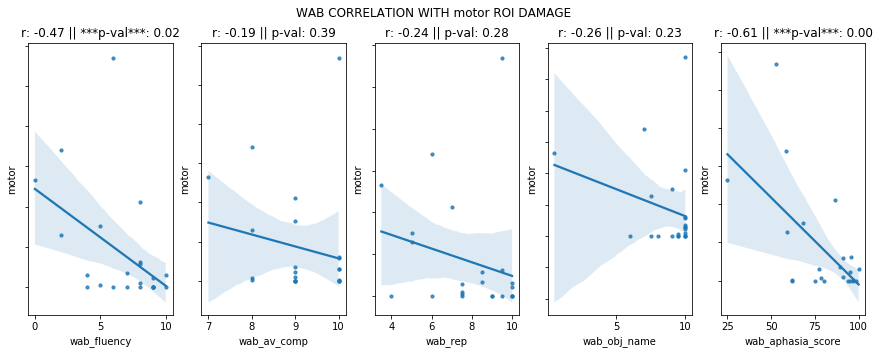

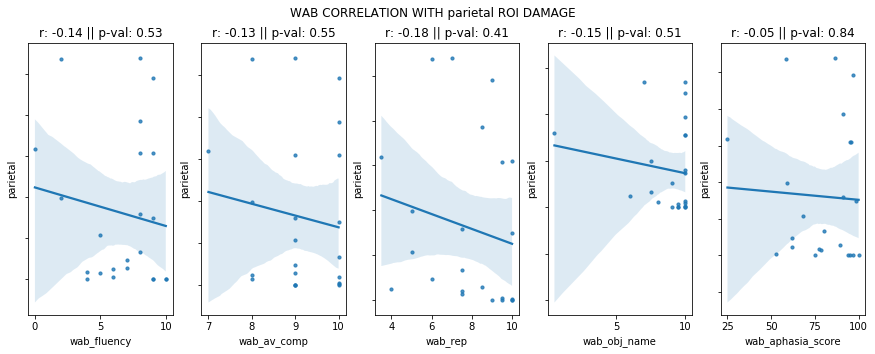

In [107]:
## PLOT SCATTERPLOTS OF 
## ROI DAMAGE VS WAB
wab_roi_damage = pd.merge(roi_damage_DF, behavDF, on=["subj"])
draw_scatterplots(wab_roi_damage, roi_list, wab_list, " ROI DAMAGE")

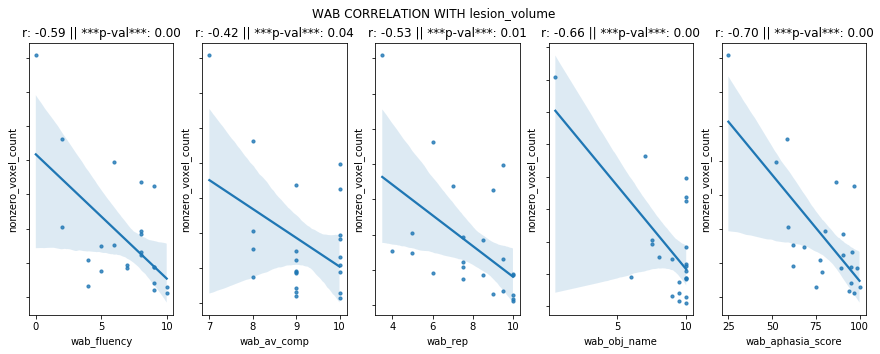

In [108]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(15, 5))            
for j, wab_score in enumerate(wab_list):
    X = 'nonzero_voxel_count'
    Y = wab_score
    DATA = lesion_wab_DF[[Y, X]]

    correlation, p_value = pearsonr(DATA[X], DATA[Y])
    sns.regplot(y=X, x=Y, data=DATA, ax=axes[j], scatter_kws={'s': 10})
    if p_value <= 0.05:
        axes[j].set_title(f'r: {correlation:.2f} || ***p-val***: {p_value:.2f}')
    else:
        axes[j].set_title(f'r: {correlation:.2f} || p-val: {p_value:.2f}')
    axes[j].set_yticklabels(axes[j].get_yticklabels(), fontsize=8)  # Set the fontsize to 8 for y-axis labels
    plt.suptitle('WAB CORRELATION WITH lesion_volume')

___
#### **SHOW WM STREAMLINE DEFICIENCY CORRELATION WITH EACH WAB SCORE (BAR CHART)**
___

In [109]:
streamline_wab_corr = streamline_wab_corr.rename(columns={'Unnamed: 0': 'tract_name'})

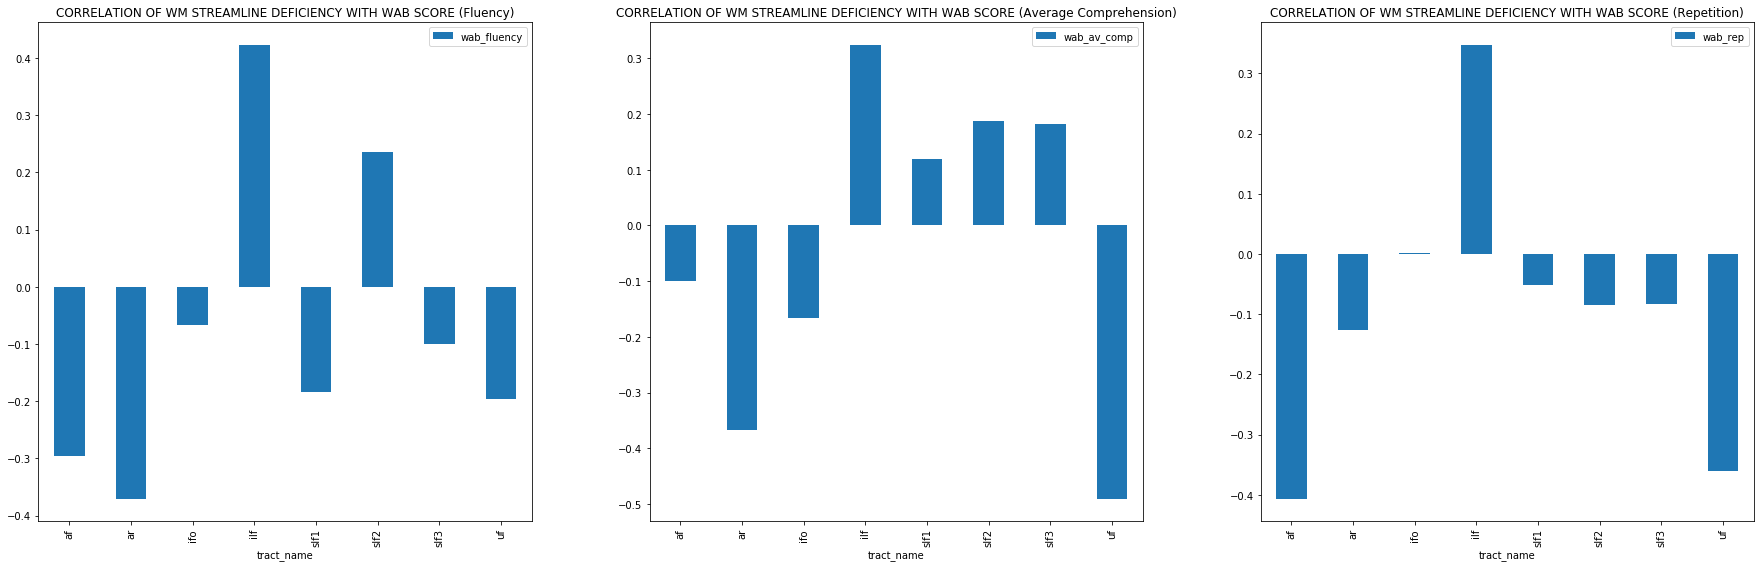

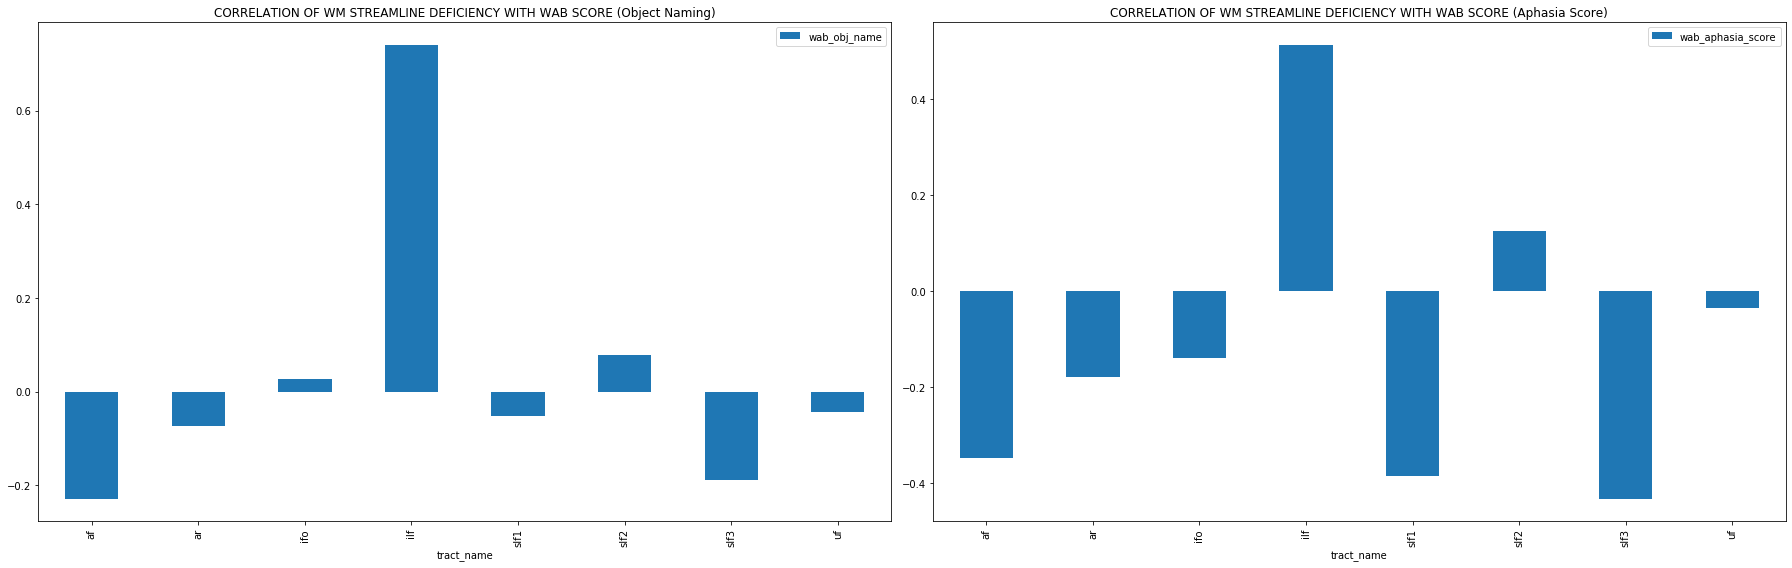

In [110]:
fig, axes = plt.subplots(1, 3, figsize=(25, 8))
streamline_wab_corr.plot(x='tract_name', y='wab_fluency', kind='bar', ax=axes[0], title='CORRELATION OF WM STREAMLINE DEFICIENCY WITH WAB SCORE (Fluency)')
streamline_wab_corr.plot(x='tract_name', y='wab_av_comp', kind='bar', ax=axes[1], title='CORRELATION OF WM STREAMLINE DEFICIENCY WITH WAB SCORE (Average Comprehension)')
streamline_wab_corr.plot(x='tract_name', y='wab_rep', kind='bar', ax=axes[2], title='CORRELATION OF WM STREAMLINE DEFICIENCY WITH WAB SCORE (Repetition)')
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(25, 8))
streamline_wab_corr.plot(x='tract_name', y='wab_obj_name', kind='bar', ax=axes[0], title='CORRELATION OF WM STREAMLINE DEFICIENCY WITH WAB SCORE (Object Naming)')
streamline_wab_corr.plot(x='tract_name', y='wab_aphasia_score', kind='bar', ax=axes[1], title='CORRELATION OF WM STREAMLINE DEFICIENCY WITH WAB SCORE (Aphasia Score)')
plt.tight_layout()
plt.show()

<!-- let closing_price_list: Vec<f64> = new::Vec();
let date_list: Vec<NaiveDate> = new::Vec();

Vector<(NaiveDate, price)>

for item in bushra{
    closing_price_list.push(item['closing_price])
    date_list.push(convert_to_naive_date(item['time_stamp']))
} -->
